# Regression with AutoML (auto-sklearn)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import datasets, metrics, model_selection, preprocessing, pipeline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import autosklearn.regression

Load the data set

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

print('train samples:', len(X_train))
print('test samples', len(X_test))

train samples: 354
test samples 152


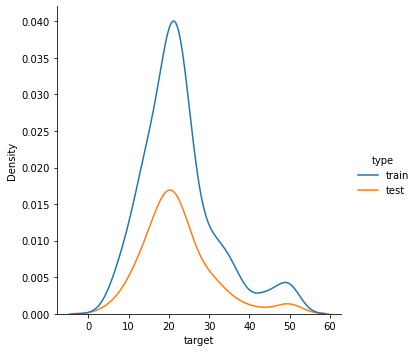

In [5]:
df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.displot(df_set, x="target" ,hue="type", kind="kde", log_scale=False)

**Note:** We do some restrictions here running time and number of ensembles, because the model fitting would not take much longer. So this is just an example how you could run AutoML.

In [6]:
model = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=30, ensemble_size=3)

In [7]:
%%capture
# ignore oput from model fit with capture magic command
model.fit(X_train, y_train)

Print the final ensemble constructed by auto-sklearn

In [8]:
for m in model.get_models_with_weights():
    print(m)

(0.6666666666666666, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'extra_trees', 'feature_preprocessor:feature_agglomeration:affinity': 'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': 'average', 'feature_preprocessor:feature_agglomeration:n_clusters': 272, 'feature_preprocessor:feature_agglomeration:pooling_func': 'median', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'mse', 'regressor:extra_trees:max_depth': 'None', 'regressor:extra_trees:max_features': 0.5120356089629183, 'regressor:extra_trees:max_leaf_nodes': 'None', 'regressor:extra_

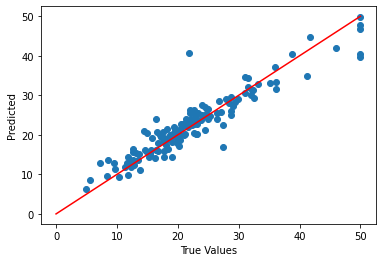

In [9]:
predicted = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
_ = ax.plot([0, y.max()], [0, y.max()], ls='-', color='red')

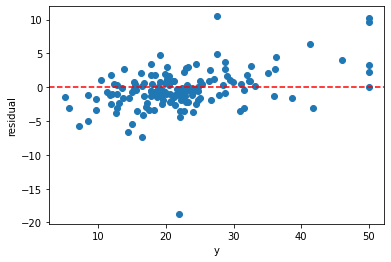

In [10]:
residual = y_test - predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residual)
ax.set_xlabel('y')
ax.set_ylabel('residual')

_ = plt.axhline(0, color='red', ls='--')

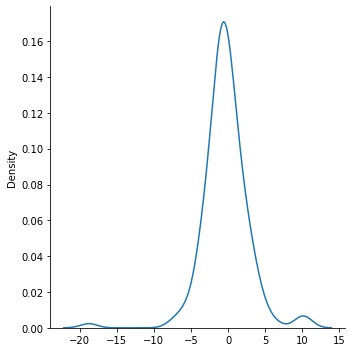

In [11]:
sns.displot(residual, kind="kde");

In [12]:
print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.8758415984613225
mse: 9.54902438198514
rmse: 3.090149572752934
mae: 2.0655230945662453
